In [42]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('data/TAG_Krems_19400101_20211231.csv')

## Set index for time and year

In [45]:
for i in range(0, data.index.size):
    data.time[i] = datetime.strptime(data.time[i], '%Y-%m-%d')
    data['year'] = 0
for j in range(0, data.index.size):
    data['year'][j] = (data.time[j].strftime('%Y'))

/tmp/ipykernel_51409/2667031241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.time[i] = datetime.strptime(data.time[i], '%Y-%m-%d')
/tmp/ipykernel_51409/2667031241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.time[i] = datetime.strptime(data.time[i], '%Y-%m-%d')
/tmp/ipykernel_51409/2667031241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][j] = (data.time[j].strftime('%Y'))


## Calculate heatdays in Krems

In [56]:
data['heatday'] = 0
data['frosttage'] = 0
data['good_night'] = 0
for k in range(0, data.index.size):
    if data.tmax[k] > 29.9:
        data['heatday'][k] = 1
    else:
        data['heatday'][k] = 0
    if data.tmin[k] < 20:b
        data['good_night'][k] = 1
    else:
        data['good_night'][k] = 0
    if data.tmin[k] < 0:
        data['frosttage'][k] = 1
    else:
        data['frosttage'][k] = 0

/tmp/ipykernel_51409/462148994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heatday'][k] = 0
/tmp/ipykernel_51409/462148994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['good_night'][k] = 1
/tmp/ipykernel_51409/462148994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['frosttage'][k] = 1
/tmp/ipykernel_51409/462148994.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [99]:
data['extreme_heat'] = 0
for k in range(0, data.index.size):
    if data.tmax[k] > 35:
        data['extreme_heat'][k] = 1
    else:
        data['extreme_heat'][k] = 0

/tmp/ipykernel_51409/2383277161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['extreme_heat'][k] = 0
/tmp/ipykernel_51409/2383277161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['extreme_heat'][k] = 1


Text(0.5, 1.0, 'Number of heatdays in Krems')

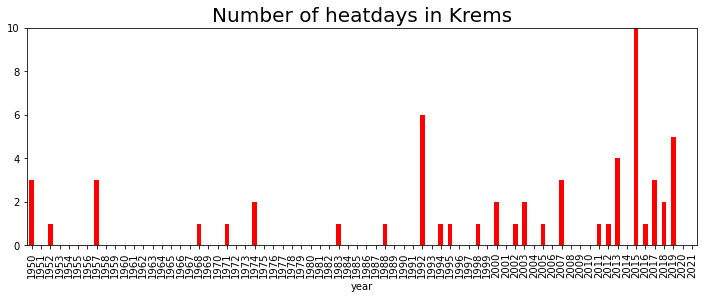

In [110]:
plt.figure(figsize=(12,4))
grouped_df['extreme_heat'][10:].plot(kind = 'bar', color = "r")
plt.ylim(0,10)
plt.title('Number of heatdays in Krems', fontsize = 20)

In [101]:
grouped_df = data.groupby('year').sum()
#grouped_df['frosttage'].plot(kind = 'bar')
#grouped_df['frosttage'].plot(kind = 'bar', ax=ax, color = "b")

In [46]:
data = data.drop(['station'], axis = 1)
data = data.drop(['substation'], axis = 1)

In [47]:
data = data.sort_values('time')
data = data.set_index('time')

<AxesSubplot:xlabel='time'>

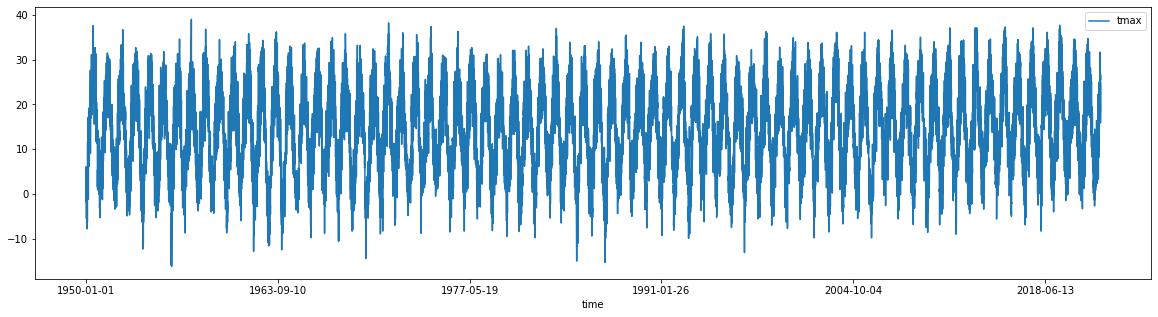

In [50]:
data.plot(figsize=(20,5))

In [38]:
data['year'] = data

,tmax
time,
1961-01-01,NaN
1961-01-01,0.0
1961-01-02,0.4
1961-01-02,NaN
1961-01-03,NaN
...,...
2022-06-27,NaN
2022-06-28,NaN
2022-06-28,NaN


In [75]:
#for i in range(0, data.index.size):
#   data['year'][i] = data.index[i][:4]
data['year'] = data.index

In [92]:
for i in range(0, data.index.size):
    data['year'][i] = data['year'][i][:4]

/tmp/ipykernel_26737/2572268853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][i] = data['year'][i][:4]


In [95]:
data['heatday'] = data['tmax']
data

,tmax,year,heatday
time,,,
1950-01-01,-1.7,1950,-1.7
1950-01-02,0.8,1950,0.8
1950-01-03,2.2,1950,2.2
1950-01-04,3.0,1950,3.0
1950-01-05,0.1,1950,0.1
...,...,...,...
2022-05-28,21.7,2022,21.7
2022-05-29,15.9,2022,15.9
2022-05-30,20.4,2022,20.4


In [98]:
data['heatday'] = data['tmax']
for i in range(0, data.index.size):
    if data['heatday'][i] > 29:
        data['heatday'][i] = 1
        print('heatday!')
    else:
        data['heatday'][i] = 0

/tmp/ipykernel_26737/2581086834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heatday'][i] = 0
/tmp/ipykernel_26737/2581086834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heatday'][i] = 1


heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
h

heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
heatday!
h

In [101]:
yearly = data.groupby('year').sum()

In [107]:
yearly = yearly.drop(['tmax'], axis = 1)

<AxesSubplot:xlabel='year'>

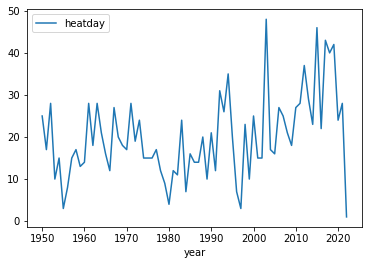

In [108]:
yearly.plot()

In [57]:
246-234

12